In [1]:
import numpy as np
import matplotlib.pyplot as plt # data visualization library

In [2]:
# Due to compatibility issues the scikit-lear version differs from the suggested one.

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.6.0.


In [3]:
# numpy 2.x versions report compatiblity errors with sklearn and scipy

print('The numpy version is {}.'.format(np.__version__))

The numpy version is 1.26.4.


# Exercise 1 (PCA Faces)

## Import

In [4]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

## Provided example code

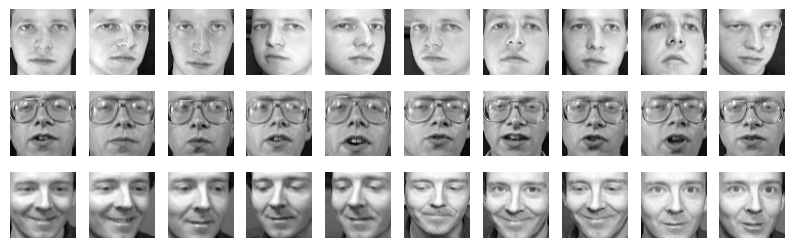

In [5]:
# This is how you plot the first thirty pictures of the dataset
fig = plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot2grid((3, 10), (int(i/10), i-int(i/10)*10))
    
    ax.imshow(faces.data[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [6]:
D = faces.data
D.shape

(400, 4096)

## Computation

Use the function `linalg.svd` from `scipy (version 1.14.1)` to compute the PCA for exercise 1a, b, c. The PCs can always point into two directions: the positive and the negative. To reproduce the result and to get the same image as provided as an option you need to use scipy. If you use numpy, you get however a similarly looking face from which you probably can infer the correct solution in ANS. Note: Using a different library may yield different results, trying to use direct PCA function from a library will not do the job here.  

The pseudo code to do this is as follows: 
1. center the data
2. perform SVD using scipy.linalg.svd
3. extract the top `r` principal components
4. compute the low-dimensional representation of the SVD
5. reconstruct the data

In [8]:
from scipy import linalg
#step 1: center the data
mu_F = np.mean(D, axis=0)
D_centered = D - mu_F

#step 2: perform SVD using scipy.linalg.svd
U, Sigma, Vt = linalg.svd(D_centered, full_matrices=False)

### a) 
Plot the specified principal components to perform the matching on ANS

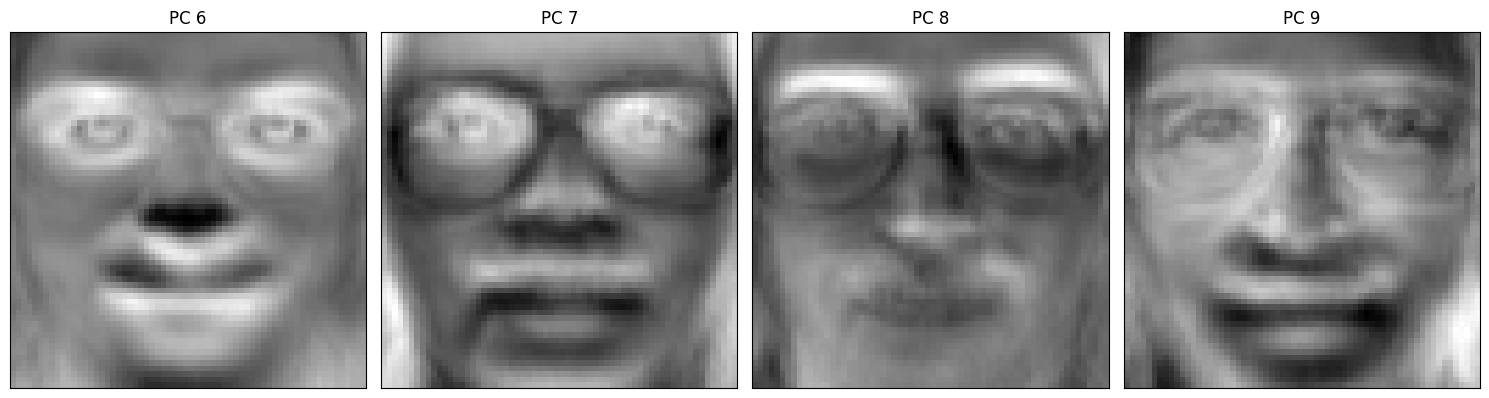

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5), subplot_kw={"xticks": [], "yticks": []})

pcs_to_plot = [5, 6, 7, 8]  # PCs to visualize (PC6 to PC9)
for i, pc_index in enumerate(pcs_to_plot):
    axes[i].imshow(Vt[pc_index].reshape(64, 64), cmap="gray")
    axes[i].set_title(f"PC {pc_index + 1}")

plt.tight_layout()
plt.show()

## b)
Compute a PCA of dimension r = 4.

In [11]:
#step 3: extract the top `r` principal components
r = 4
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
Vt_r = Vt[:r, :]

#step 4: compute the low-dimensional representation
Y = np.dot(D_centered, Vt_r.T)

#step 5: reconstruct the data
D_reconstructed = np.dot(Y, Vt_r) + mu_F

#print the requested value
low_dim_coordinates = Y[7]  # Python index 7 corresponds to the 8th data point
print("Low-dimensional coordinates of the 8th data point:", low_dim_coordinates)

Low-dimensional coordinates of the 8th data point: [-5.623234   3.7984452  1.5069323  0.682338 ]


## c)
Generate a face by means of a PCA with a rank of r=90.

In [12]:
#step 3: repeate step 3 as before, but with r = 90
r = 90
U_r = U[:, :r]
Sigma_r = np.diag(Sigma[:r])
Vt_r = Vt[:r, :]

#step 4: define the low-dimensional vector as provided in the assignment
low_dim_vector = np.array([0.5] * 45 + [-0.5] * 45)

#step 5: reconstruct the face (data)
reconstructed_face = np.dot(low_dim_vector, Vt_r) + mu_F

### Visualize the result

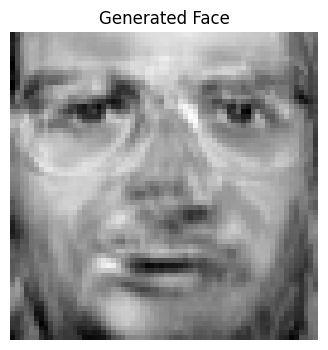

In [13]:
plt.figure(figsize=(4, 4))
plt.imshow(reconstructed_face.reshape(64, 64), cmap='gray')
plt.axis('off')
plt.title("Generated Face")
plt.show()